# Analyzing borrowers’ risk of defaulting
prepare a report for a bank’s loan division,To find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan

In [8]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt 


In [4]:
# Load the data
df = pd.read_csv('credit_scoring_eng.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


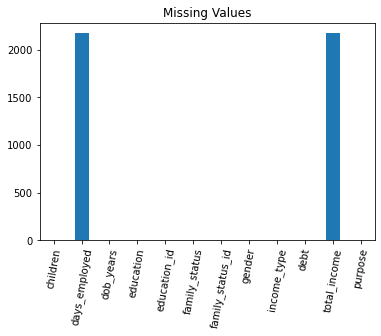

In [9]:
x = df.isna().sum().plot(kind="bar",)
x.set_title('Missing Values')
x.set_xticklabels(df.columns,rotation = 80)
plt.show()

days_employed and total_income have missing values lets check why?

In [10]:
display(df[df['days_employed'].isna()])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


We can see that days_employed correspond with the person not working at the moment which will lead to them not receiving an income 

**Conclusions**

There are  2174 na values in columns days employed and total income. There is a correlation if the worker hasnt been 
working then they will not be able to present a value in this column. If they are not working then they cant fill in the total_income column either 



In [11]:
# Let's see all values in education column to check if and what spellings will need to be fixed
display(df['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [12]:
# Fix the registers if required

df.education = df.education.str.lower()
display(df.education.value_counts())


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [13]:
# Checking all the values in the column to make sure we fixed them
display(df['education'].value_counts())


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [14]:
# Let's see the distribution of values in the `children` column
display(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [15]:
# We can drop the data with the corresponding values of 20 and -1 since they are less than %5 of the data 

df =  df[df.children != 20]
df =  df[df.children != -1]

In [16]:
# Checking the `children` column again to make sure it's all fixed
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [17]:
negative = df[df['days_employed'] <= 0].count()
neg_percent = (df['days_employed'] <= 0).sum() * 100/len(df)
print(f'The percentage of rows with negative number in the days_employed column: {neg_percent.round(1)}%')

The percentage of rows with negative number in the days_employed column: 73.9%


In [18]:

df.days_employed =df.days_employed.apply(abs)

In [19]:
display(df[df.days_employed <= 0])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Some of The values have a negative which is just a typo will take the abs of number to get the value. 

In [20]:
# Check the `dob_years` for suspicious values and count the percentage
display(df['dob_years'].value_counts()) # There 101 rows with the age zero 
zero = df.dob_years <= 0 # 
display(df[zero].shape[0]*100/len(df)) 

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
44    543
29    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
57    457
53    457
51    446
59    441
55    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    263
23    252
65    194
22    183
66    183
67    167
21    110
0     100
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

0.46724605177086254

In [22]:
# I will change this rows to average age of each person 
avg = df.dob_years.mean()
df.dob_years = df.dob_years.replace(0,int(avg))

In [23]:
df[df.dob_years == 0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [24]:
df.family_status.value_counts()

married              12302
civil partnership     4160
unmarried             2799
divorced              1189
widow / widower        952
Name: family_status, dtype: int64

In [25]:
df.gender.value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

In [26]:
display(df[df.gender == 'XNA'])
df = df.drop(10701)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [27]:
display(df[df.gender == 'XNA'])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


The gender column had a unknown value so I just dropped the column. 

In [29]:
# Let's see the values in the column
display(df.income_type.value_counts())

employee                       11050
business                        5053
retiree                         3839
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [30]:
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)

71


In [31]:
# Address the duplicates, if they exist
df = df.drop_duplicates().reset_index(drop = True)

# Working with missing values

In [33]:
# Find the dictionaries

display(df.education_id.value_counts())
display(df.education.value_counts())
# we can use a dictionary for the education and the education Id column 
frequency = pd.Series(df.education.values,index = df.education_id).to_dict()
print(frequency)

1    15075
0     5227
2      740
3      282
4        6
Name: education_id, dtype: int64

secondary education    15075
bachelor's degree       5227
some college             740
primary education        282
graduate degree            6
Name: education, dtype: int64

{0: "bachelor's degree", 1: 'secondary education', 2: 'some college', 3: 'primary education', 4: 'graduate degree'}


### Restoring missing values in `total_income`

In [34]:
# Let's write a function that calculates the age category

def age_group(age):
    if age <30:
        return 'young'
    elif age < 50:
        return 'adult'
    else: 
        return 'grandpa'

In [35]:
# Creating new column based on function
df['age_group'] = df.dob_years.apply(age_group)
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,grandpa
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,young
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,grandpa
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [36]:
# Checking how values in the new column
df.age_group.value_counts()

adult      11043
grandpa     7122
young       3165
Name: age_group, dtype: int64

In [37]:
new_df = df.dropna(how ='any')
display(new_df[new_df.isnull().any(axis =1)])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [38]:

print(new_df.total_income.mean())

26791.50317506113


In [39]:

print(new_df.total_income.median())

23202.87


In [41]:
#a function that we will use for filling in missing values
def missing_na(df):
    return df.total_income.fillna(df.total_income.mean())

In [42]:
df.total_income = missing_na(df)

In [43]:
display(df[df.total_income.isnull()])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [44]:
# Checking the number of entries in the columns
df.total_income.count()

21330

 In this Section we dropped all the na values from the dataset and got the mean for total_income and Days_employed .After we input the data into the na values 

###  Restoring values in `days_employed`

In [45]:
# Distribution of `days_employed` medians based on your identified parameters
print(new_df.days_employed.sort_values().median())

2194.8143415297573


In [46]:
# Distribution of `days_employed` means based on your identified parameters
print(new_df.days_employed.mean())

67031.05281286135


In [47]:
def missing_na_mean(df):
    return df.days_employed.fillna(df.days_employed.mean())

In [48]:
df.days_employed = missing_na_mean(df)


In [49]:
display(df.days_employed.isnull().sum())

0

This section we took the mean of the column days_employed and we filled in the na values with the mean 
 After doing so we checked if there are any nan values in the column 

## Categorization of data

In [50]:
display(df.children.value_counts())

0    14090
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [52]:
# a function to categorize the data based on common topics
def children_type(age):
    if age == 0:
        return 'No children' 
    elif age == 1:
        return '1 child'
    elif age == 2 or age ==3:
        return '2-3 Children'
    else:
        return 'more than 3 children'

In [53]:
df['children_cat'] = df.children.apply(children_type)

In [54]:
display(df.children_cat.value_counts())
display(df[['children','children_cat']].head(10))
display(df[['children','children_cat']].tail(10))

No children             14090
1 child                  4808
2-3 Children             2382
more than 3 children       50
Name: children_cat, dtype: int64

,children,children_cat
0,1,1 child
1,1,1 child
2,0,No children
3,3,2-3 Children
4,0,No children
5,0,No children
6,0,No children
7,0,No children
8,2,2-3 Children
9,0,No children


,children,children_cat
21320,1,1 child
21321,0,No children
21322,0,No children
21323,0,No children
21324,1,1 child
21325,1,1 child
21326,0,No children
21327,1,1 child
21328,3,2-3 Children
21329,2,2-3 Children


In [58]:
df.total_income.describe()

count     21330.000000
mean      26791.503175
std       15667.684517
min        3306.762000
25%       17200.597250
50%       24972.716500
75%       31331.348000
max      362496.645000
Name: total_income, dtype: float64

In [60]:
# Creating function for categorizing into different numerical groups based on ranges
def income_level(salary):
    if salary < 50000:
        return 'low'
    elif salary < 85000:
        return 'mid low'
    elif salary < 120000:
        return 'mid'
    else:
        return'high'

In [61]:
# Creating column with categories
df['salary_cat'] = df.total_income.apply(income_level)

In [62]:
df.salary_cat.value_counts()

low        20014
mid low     1144
mid          123
high          49
Name: salary_cat, dtype: int64

## Checking the Hypotheses

2.463491511183893

,debt
children_cat,
1 child,444
2-3 Children,221
No children,1063
more than 3 children,4


4.9835911861228315
2.0815752461322083
0.12658227848101267
0.01875293014533521
0.0


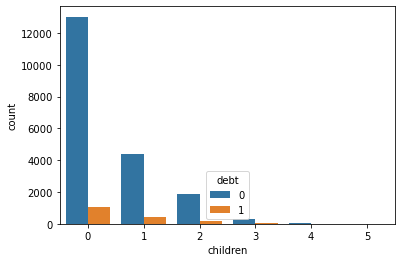

In [63]:
# Check the children data and paying back on time
# The dataset contains more entries with zerochildren paid off there loan on time 
display(df.debt.corr(df.children)*100)
import seaborn as sns
sns.countplot(x = 'children', hue = 'debt', data = df)
display(df.pivot_table(index = 'children_cat', values = 'debt', aggfunc = 'sum'))

zero = df[df['children'] == 0]['debt'].sum() *100/ len(df)
first = df[df['children'] == 1]['debt'].sum() *100/ len(df)
second = df[df['children'] == 2]['debt'].sum() *100/ len(df)
third = df[df['children'] == 3]['debt'].sum() *100/ len(df)
fourth = df[df['children'] == 4]['debt'].sum() *100/ len(df)
fifth = df[df['children'] == 5]['debt'].sum() *100/ len(df)
print(zero)
print(first)
print(third)
print(fourth)
print(fifth)


# Conclusion**

#Families with zero children had a better chance of paying off there loan on time.

,debt
family_status,
civil partnership,385
divorced,84
married,927
unmarried,273
widow / widower,63


 Default rate married: 4.345991561181434
 Default rate divorced: 0.39381153305203936
 Default rate civil partnership: 0.0
 Default rate widow / widower : 0.29535864978902954
 Default rate unmarried: 1.279887482419128


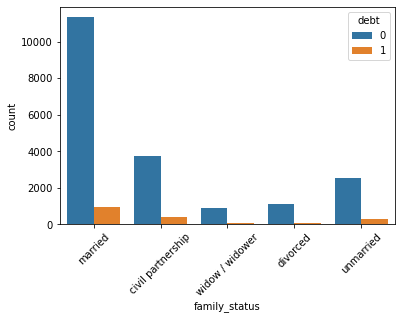

In [64]:
# Check the family status data and paying back on time

sns.countplot(x = 'family_status', hue = 'debt', data = df)
plt.xticks(rotation = 45)

display(df.pivot_table(index = 'family_status', values = 'debt', aggfunc = 'sum'))
# Calculating default-rate based on family status
print(f" Default rate married: { df[df['family_status'] == 'married']['debt'].sum() *100/ len(df)}")
print(f" Default rate divorced: { df[df['family_status'] == 'divorced']['debt'].sum() *100/ len(df)}")
print(f" Default rate civil partnership: { df[df['family_status'] == 'civil partnerhsip']['debt'].sum() *100/ len(df)}")
print(f" Default rate widow / widower : { df[df['family_status'] == 'widow / widower']['debt'].sum() *100/ len(df)}")
print(f" Default rate unmarried: { df[df['family_status'] == 'unmarried']['debt'].sum() *100/ len(df)}")

## Conclusion**
Married couples had a better chance of paying of there loan 

,debt
salary_cat,
high,4
low,1640
mid,6
mid low,82


 Default rate low: 7.688701359587435
 Default rate high: 0.01875293014533521
 Default rate mid low: 0.38443506797937177
 Default rate mid: 0.02812939521800281


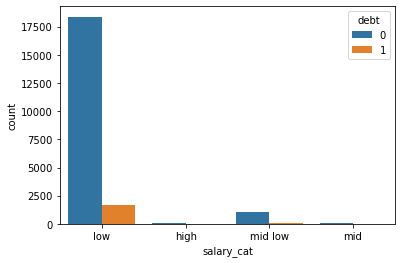

In [65]:
# Check the income level data and paying back on time
display(df.pivot_table(index = 'salary_cat', values = 'debt', aggfunc = 'sum'))
sns.countplot(x = 'salary_cat', hue = 'debt', data = df)


# Calculating default-rate based on income level
for x in df.salary_cat.unique():
    print(f" Default rate {x}: { df[df['salary_cat'] == x]['debt'].sum() *100/ len(df)}")

**Conclusion**

We can see that more lower income are taking out loans vs other income.
We need more data on how there taking out  to make an accuarte statement 

,debt
purpose_cat,
purchase house,127
housing renovation,129
Wedding,183
investment property,189
real estate,335
education,369
purchasing car,400


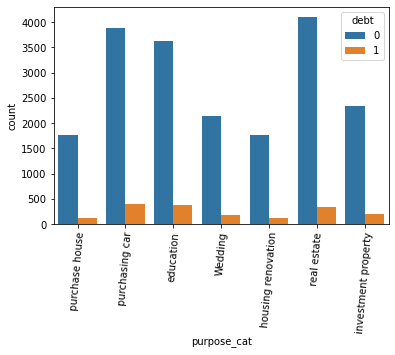

In [68]:
# Check the percentages for default rate for each credit purpose and analyze them
#The count of how many people defaulted on the reason they took out the loan 


def purpose_grouped(x):
        if 'car' in x:
            return 'purchasing car'
        elif 'educ'  in x:
            return 'education'
        elif 'real estate' in x:
            return 'real estate'
        elif 'wedding' in x:
            return 'Wedding'
        elif 'housing' in x:
            return 'housing renovation'
        elif 'house' in x:
            return "purchase house"
        elif 'property' in x:
            return 'investment property'
        else:
            return 'education'
    
        

    
df["purpose_cat"] = df.purpose.apply(purpose_grouped)


display(df.pivot_table(index = 'purpose_cat', values = 'debt', aggfunc = 'sum').sort_values("debt"))

sns.countplot(x = 'purpose_cat', hue = 'debt', data = df)
plt.xticks(rotation = 85)
plt.show()

In [69]:
for x in df.purpose_cat.unique():
    print(f" Default rate {x}: { df[df['purpose_cat'] == x]['debt'].sum() *100/ len(df)}")

 Default rate purchase house: 0.5954055321143928
 Default rate purchasing car: 1.875293014533521
 Default rate education: 1.729957805907173
 Default rate Wedding: 0.8579465541490858
 Default rate housing renovation: 0.6047819971870605
 Default rate real estate: 1.5705578996718237
 Default rate investment property: 0.8860759493670886


**Conclusion**

The dataset shows that purchasing a car had the highest defaults and buying a house has the least.

# General Conclusion 
The purpose of this anaylsis was to figure out how serveral points affect whether a customer would default on a loan. 
After preproccessing the data by checking NAN values,categorizing the data and checking gor duplicates we have come to find that customer with no children are a better fit, Married could have a better chance of paying back there loan. We can see that lower incomes have paid back there loan on time. We also can infer that purchasing a car is the highest that a customer will default and housing has the lowest percentage a customer will default. 
